In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings('once')

In [ ]:
data = pd.read_csv("data.csv")

Dividimos los datos que tenemos en la tabla en unos de entrenamiento y otros de testeo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(columns = "Index"), 
    data["Index"], 
    random_state = 0)

Se identifica el nombre de las columnas numéricas y de las categóricas

In [ ]:
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = x_train.select_dtypes(include=['float64', 'int']).columns.to_list()

Se aplica one-hot-encoding solo a las columnas categóricas


In [ ]:
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

Una vez que se ha definido el objeto ColumnTransformer, con el método fit() se aprenden las transformaciones con los datos de entrenamiento y se aplican a los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().

In [ ]:
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep  = preprocessor.transform(x_test)
x_train_prep

array([[  1.,   0., 146., 110.],
       [  0.,   1., 143.,  88.],
       [  0.,   1., 186.,  68.],
       ...,
       [  1.,   0., 146., 104.],
       [  0.,   1., 181., 111.],
       [  0.,   1., 167., 151.]])

Ahora tenemos un problema, pues el resultado devuelto por nuestro "ColumnTransformer" es un numpy array, por lo que se terminan perdiendo los nombres, entonces procederemos a transformar el resultado del column transformer en un dataframe y añadir los nombres de la columnas. Para esto es útil tener en cuenta que que el método de binarización o OneHotEncodering ordena las nuevas columnas de izquierda a derecha por orden alfabético

In [ ]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.sort(np.concatenate([numeric_cols, encoded_cat]), 0)
print(labels.tolist())

['Gender_Female', 'Gender_Male', 'Height', 'Weight']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_prep = pd.DataFrame(x_train_prep, columns=labels)
x_test_prep  = pd.DataFrame(x_test_prep, columns=labels)
x_train_prep

,Gender_Female,Gender_Male,Height,Weight
0,1.0,0.0,146.0,110.0
1,0.0,1.0,143.0,88.0
2,0.0,1.0,186.0,68.0
3,1.0,0.0,180.0,70.0
4,1.0,0.0,177.0,101.0
...,...,...,...,...
370,0.0,1.0,187.0,140.0
371,0.0,1.0,165.0,105.0
372,1.0,0.0,146.0,104.0
373,0.0,1.0,181.0,111.0


In [ ]:
modelo = DecisionTreeRegressor()

In [ ]:
modelo.fit(x_train_prep, y_train)

DecisionTreeRegressor()

In [ ]:
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

Profundidad del árbol: 9
Número de nodos terminales: 72


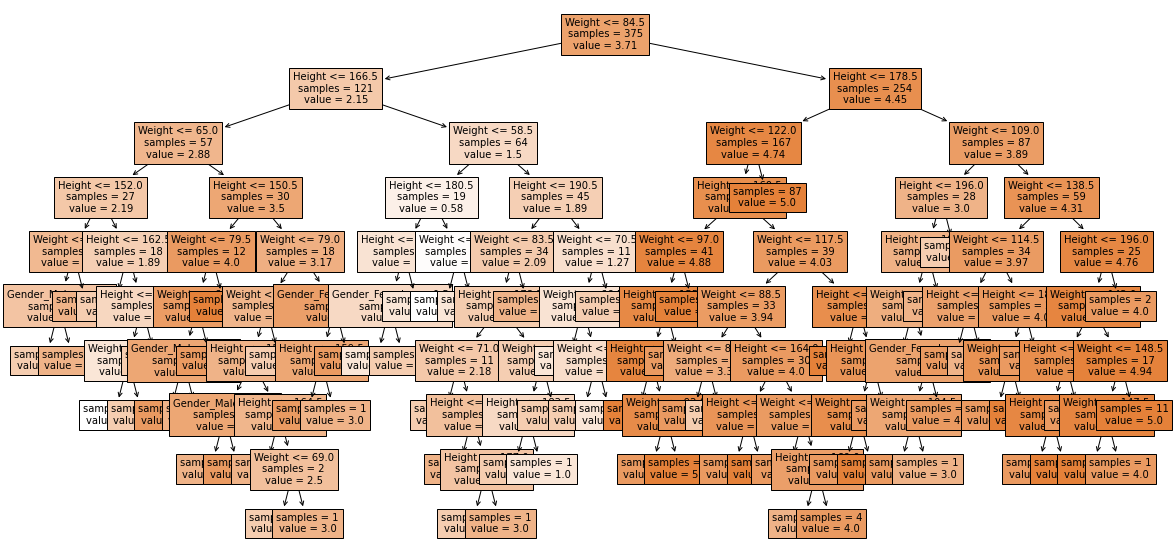

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(),
            class_names   = 'Index',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
labels.tolist()

['Gender_Female', 'Gender_Male', 'Height', 'Weight']

In [ ]:
texto_modelo = export_text(decision_tree = modelo,
                    feature_names = labels.tolist()
               )
print(texto_modelo)

|--- Weight <= 84.50
|   |--- Height <= 166.50
|   |   |--- Weight <= 65.00
|   |   |   |--- Height <= 152.00
|   |   |   |   |--- Weight <= 57.50
|   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |--- Weight >  57.50
|   |   |   |   |   |--- value: [3.00]
|   |   |   |--- Height >  152.00
|   |   |   |   |--- Height <= 162.50
|   |   |   |   |   |--- value: [2.00]
|   |   |   |   |--- Height >  162.50
|   |   |   |   |   |--- Height <= 163.50
|   |   |   |   |   |   |--- Weight <= 60.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- Weight >  60.00
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |--- Height >  163.50
|   |   |   |   |   |   |--- value: [2.00]
|   |   |--- Weight >  65.00
|   |   |   |--- Height <= 150.50
|   |   |   |   |--- Weight <= 79.50
|   |   |   |   |   |--- Weight <= 66.50


In [ ]:
predicciones = modelo.predict(X = x_test_prep)

In [ ]:
print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  2,  2,  0,  0,  0],
       [ 0,  0,  8,  4,  0,  0],
       [ 0,  0,  3, 10,  5,  0],
       [ 0,  0,  1,  3, 30,  4],
       [ 0,  0,  0,  0,  5, 45]])

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 78.4 %


Podado del arbol
Para aplicar el proceso de pruning es necesario indicar el argumento ccp_alpha que determina el grado de penalización por complejidad. Cuanto mayor es este valor, más agresivo el podado y menor el tamaño del árbol resultante. Dado que no hay forma de conocer de antemano el valor óptimo de ccp_alpha, se recurre a 
validación cruzada para identificarlo.

In [ ]:
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(x_train_prep, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

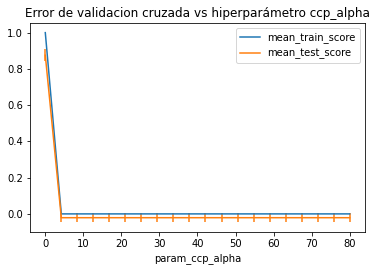

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
grid.best_params_

{'ccp_alpha': 0.0}

Profundidad del árbol: 9
Número de nodos terminales: 72


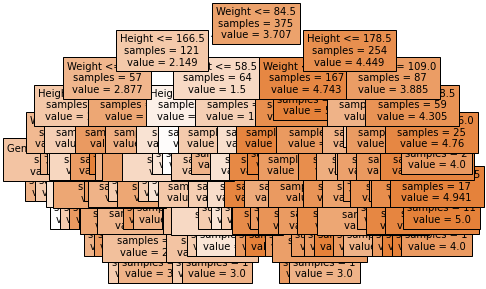

In [ ]:
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = labels.tolist(),
            class_names   = 'Index',
            filled        = True,
            impurity      = False,
            ax            = ax,
            fontsize = 10
       )

In [ ]:
predicciones = modelo_final.predict(X = x_test_prep)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 80.0 %
